# HM2 : Manualne szukanie modelu 
W tym notebooku na początku zostanie przeprowadzony preprocessing, a następnie kilka modeli zostanie nauczonych na danych treninogowych oraz następnie przetestowanych.

### Import plików

In [1]:
import pandas as pd

# nazwy plików
# root oznacza ścieżkę, którą należy odpowiednio zmienić
file_path_test = "root/artificial_test.data"
file_path_train = "root/artificial_train.data"
file_path_labels = "root/artificial_train.labels"

# import pliku z danymi do trenowania
data = pd.read_csv(file_path_train, sep=" ", header = None )
data = data[data.columns[:-1]]

data_labels = pd.read_csv(file_path_labels, header = None)

# import pliku z danymi do robienia predykcji
test = pd.read_csv(file_path_test, sep=" ", header = None)
test = test[test.columns[:-1]]

### Preprocessing

Sprawdzenie czy nie ma potrzeby uzupełniania pustych komórek o ile takie wystąpią.

In [2]:
# sprawdzenie czy istnieją puste komórki
nan_sum = sum(data.isna().sum())
nan_sum

0

Sprawdzenie zależności pomiędzy poszczególnymi cechami zbioru.

Text(0.5, 1.0, 'Correlation Matrix')

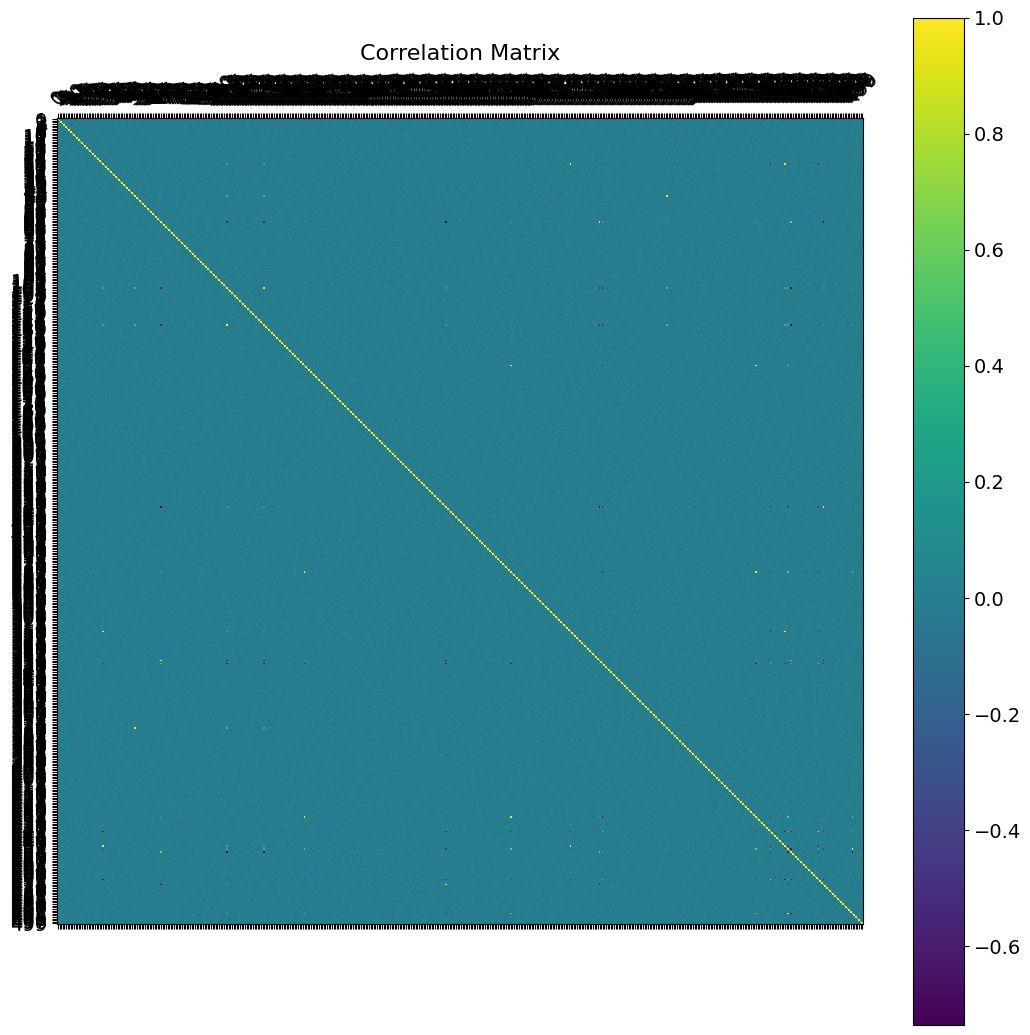

In [3]:
import matplotlib.pyplot as plt

# macierz korelacji
f = plt.figure(figsize=(13, 13))
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

Sprawdzenie czy ilość elementów w każdej z klas jest podobna.

In [54]:
print(f'number of 1 values : {sum([i for i in data_labels[0] if i == 1])}')
print(f'number of -1 values : {sum([i for i in data_labels[0] if i == -1])}')

number of 1 values : 1000
number of -1 values : -1000


Rozmiar oraz wygląd zbioru.

In [4]:
data.shape

(2000, 500)

In [14]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,485,477,537,479,452,471,491,476,475,473,...,477,481,477,485,511,485,481,479,475,496
1,483,458,460,487,587,475,526,479,485,469,...,463,478,487,338,513,486,483,492,510,517
2,487,542,499,468,448,471,442,478,480,477,...,487,481,492,650,506,501,480,489,499,498
3,480,491,510,485,495,472,417,474,502,476,...,491,480,474,572,454,469,475,482,494,461
4,484,502,528,489,466,481,402,478,487,468,...,488,479,452,435,486,508,481,504,495,511


W związku z powyższymi wynikami, jako że zbiór jest bez pustych komórek oraz korelacje nie zachodzą jedyny preprocessing jaki zastosujemy to ograniczenie ilości cech, których jest aż 500.

Podział danych na zbiory uczący i testowy.

In [64]:
from sklearn.model_selection import train_test_split
# podział danych 7:3
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(
        data, data_labels, test_size = test_size, random_state=42)

### Preprocessing cech

C:\Users\AWeg\AppData\Local\Temp\ipykernel_9384\288815337.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


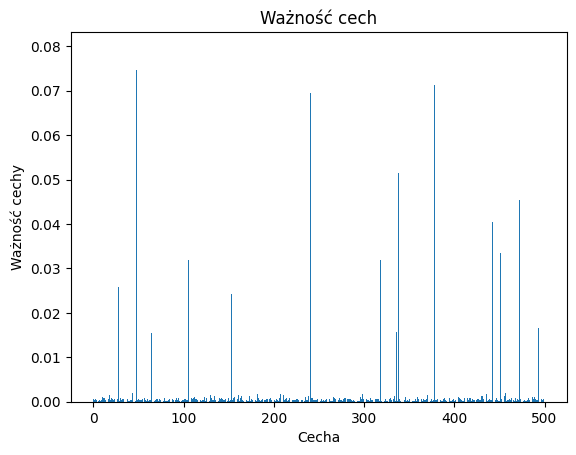

In [65]:
# wykorzystanie drzew decyzyjnych do wyboru najważniejszych cech
from matplotlib import pyplot
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(class_weight='balanced',
                                               max_features=450,
                                               min_samples_leaf=20,
                                               min_samples_split=18,
                                               random_state=42)
model.fit(X_train, y_train)
importance = model.feature_importances_
# wykres obrazujący wazność cech
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.title('Ważność cech')
pyplot.xlabel('Cecha')
pyplot.ylabel('Ważność cechy')
pyplot.show()

Opierając się na powyższym wykresie wybranie cech najbardziej znaczących - powyżej progu 0.003.

In [7]:
selected = (abs(importance) > 0.003).tolist()

indexes = [i for i, n in enumerate(selected) if n == True]
print(f"Number of selected features: {len(indexes)}")

Number of selected features: 20


In [49]:
# przygotowanie danych
X_train = X_train[indexes]
X_test = X_test[indexes]
test = test[indexes]
# sprawdzenie czy liczba cech się zmniejszyła
X_test.shape

(600, 20)

### Uczenie dla wybranych modeli: regresja logistyczna, las losowy, SVC
W czasie szukania podane modele były uzupełniane różnymi wartościami w celu znalezienia tych najtrafniejszych. Przedstawione zostały modele z parametrami, które dały najlepsze rezultaty.

In [9]:
from sklearn.metrics import balanced_accuracy_score

Regresja liniowa

In [24]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42,penalty='l2').fit(X_train, y_train)
pred_linreg = clf.predict(X_test)
print(f"balanced accuracy for test set: {balanced_accuracy_score(pred_linreg, y_test)}")
pred_linreg = clf.predict(X_train)
print(f"balanced accuracy for train set: {balanced_accuracy_score(pred_linreg, y_train)}")

c:\Users\AWeg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\AWeg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


balanced accuracy for test set: 0.5916666666666667
balanced accuracy for train set: 0.612887336465885


Las losowy

In [47]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=90, bootstrap=False,  max_depth=21,
             max_features= 0.1, min_samples_leaf=2, min_samples_split=4)

random_forest.fit(X_train, y_train)
pred_randomF = random_forest.predict(X_test)
print(f"balanced accuracy for test set: {balanced_accuracy_score(pred_randomF, y_test)}")
pred_randomF = random_forest.predict(X_train)
print(f"balanced accuracy for train set: {balanced_accuracy_score(pred_randomF, y_train)}")

C:\Users\AWeg\AppData\Local\Temp\ipykernel_9384\3936822744.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train, y_train)


balanced accuracy for test set: 0.8967737630534147
balanced accuracy for train set: 1.0


SVC

In [37]:
from sklearn import svm

clf = svm.SVC(kernel='rbf', C=4, degree = 3)
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)
print(f"balanced accuracy for test set: {balanced_accuracy_score(pred_clf, y_test)}")
pred_clf = clf.predict(X_train)
print(f"balanced accuracy for train set: {balanced_accuracy_score(pred_clf, y_train)}")

c:\Users\AWeg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


balanced accuracy for test set: 0.8601193452678602
balanced accuracy for train set: 0.8887015453116816


### Predykcje dla zbioru testowego wykorzystując las losowy

Model uczony na różnych częściach zbioru w celu sprawdzenia czy wynik predykcji będzie na stałym poziomie.

In [62]:
# model uczony na różnych częściach zbioru
data_for_fit = data[indexes]
for round in range(20):
    test_size = 0.3
    # podział danych z różną wielkością random state
    X_train_pred, X_test_pred, y_train_pred, y_test_pred = train_test_split(
        data, data_labels, test_size = test_size, random_state=round)

    random_forest = RandomForestClassifier(n_estimators=90, bootstrap=False,  max_depth=21,
             max_features= 0.1, min_samples_leaf=2, min_samples_split=4)
    random_forest.fit(X_train, y_train[0])
    pred_randomF = random_forest.predict(X_test)
    print(f"Probe {round} : balanced accuracy for test set: {balanced_accuracy_score(pred_randomF, y_test[0])}")
    

Probe 0 : balanced accuracy for test set: 0.8966379549874965
Probe 1 : balanced accuracy for test set: 0.8883219954648526
Probe 2 : balanced accuracy for test set: 0.8917230030243729
Probe 3 : balanced accuracy for test set: 0.885051592243373
Probe 4 : balanced accuracy for test set: 0.885051592243373
Probe 5 : balanced accuracy for test set: 0.8901010909818837
Probe 6 : balanced accuracy for test set: 0.8902190723083256
Probe 7 : balanced accuracy for test set: 0.8836927118700671
Probe 8 : balanced accuracy for test set: 0.8854505367244221
Probe 9 : balanced accuracy for test set: 0.8849573257467995
Probe 10 : balanced accuracy for test set: 0.8949591038406828
Probe 11 : balanced accuracy for test set: 0.8921317535967217
Probe 12 : balanced accuracy for test set: 0.8849615538468376
Probe 13 : balanced accuracy for test set: 0.8867647549461182
Probe 14 : balanced accuracy for test set: 0.8882912517780939
Probe 15 : balanced accuracy for test set: 0.8901010909818837
Probe 16 : balanced 

Wynik predykcji na stałym poziomie, a zatem model uczony na całym zbiorze danych, a następnie przeprowadzona predykcja z wyznaczeniem prawdopodobieństwa przynależności do klasy 1 dla zbioru testowego.

In [56]:
# model uczony na całym zbiorze danych
data_for_fit = data[indexes]
random_forest_for_last_pred = RandomForestClassifier(n_estimators=90, bootstrap=False,  max_depth=21,
             max_features= 0.1, min_samples_leaf=2, min_samples_split=4)

random_forest_for_last_pred.fit(data_for_fit, data_labels)

C:\Users\AWeg\AppData\Local\Temp\ipykernel_9384\3795781479.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_for_last_pred.fit(data_for_fit, data_labels)


RandomForestClassifier(bootstrap=False, max_depth=21, max_features=0.1,
                       min_samples_leaf=2, min_samples_split=4,
                       n_estimators=90)

Zapis wyników do pliku txt.

In [57]:
# numery indeksów dodawane ręcznie po utworzeniu pliku
pred = random_forest_for_last_pred.predict_proba(test)[:,1]
with open("random_forest.txt", "w") as txt_file:
    for line in pred:
        txt_file.write(str(line)+'\n')